In [2]:
#import dependencies
import pandas as pd
import json
import gzip 
from collections import Counter
from datetime import datetime as dt

In [57]:
text_sample = ["I walk the dog! I have fun.", "Shrek 3 is a great movie. \n I love the scenes with Donkey in them", "You have to try a little tenderness <3."]
print(text_sample)

['I walk the dog! I have fun.', 'Shrek 3 is a great movie. \n I love the scenes with Donkey in them', 'You have to try a little tenderness <3.']


In [138]:
for words in text_sample: 
    print((int(len(words.split()))))


7
14
8


In [5]:
#reading in the data
df = pd.read_json('../data/original/DNA_DATA_FULL.gz', compression='gzip')

In [154]:
#dropping all the columns except for body
text = df['body'].fillna("Nothing")
print(text)

0          "When we decided to purchase new ultrasound eq...
1          A similar ban already applies to self-insured ...
2          Dr. Curiel is the leader for TumAdoR Project 6...
3          Cost of manufactured product increased $4.7 mi...
4          The international trademark goods and services...
                                 ...                        
1942850    Item 7.01 - Regulation FD Disclosure\n\nOn May...
1942851    The so-called civil investigative demands seek...
1942852    Our news journalists obtained a quote from the...
1942853    Here is a record of Ronda E. Stryker's transac...
1942854    The deal will enable Zogenix to focus on the l...
Name: body, Length: 1942855, dtype: object


In [127]:
text_subset = text.head(5)
print(text_subset)

0    "When we decided to purchase new ultrasound eq...
1    A similar ban already applies to self-insured ...
2    Dr. Curiel is the leader for TumAdoR Project 6...
3    Cost of manufactured product increased $4.7 mi...
4    The international trademark goods and services...
Name: body, dtype: object


In [128]:
word_count = []

for words in text_subset:
   word_count.append(int(len(words.split()))) 
#print(word_count)

#did not work because it is not a data frame but a series
#text_subset.insert(1, 'Word Count', word_count)

#attempting with pandas series
# adding list data 
# creating new column 
#text_subset['Word count']= df['body'].add(word_count) 

#also did not work trying original method 

#text_subset["Word Count"]  = word_count

#using assign method
#text_subset.assign(words = word_count)
#print(text_subset)

#print(type(word_count))

In [129]:
text_body = []

for body in text_subset:
    text_body.append(body)

In [136]:
#Word Count – should probably not be over 10,000 words, 
#we may want consider less than 100 words invalid as well (NA- agree?)
validity = []

#creates a loop where any text with less than 100 words or more than 10,000 words is considered an invalid 
#data point. The reason for these numbers are that anything less than 100 words does not fit our definition of
#an article and anything longer than 10,000 words is too long for us to check?
for number in word_count:
    if number < 100:
        validity.append(0)
        
    elif number > 10000:
        validity.append(0)
        
    else:
        validity.append(1)
print(validity)

[1, 1, 1, 1, 0]


In [170]:
#Validity percentage
total_valid = sum(validity)

print('{}% of the data are valid.'.format(total_valid/len(validity)*100)  )

80.0% of the data are valid.


In [137]:
#creates a data frame with all the 
sample_df = pd.DataFrame()
sample_df['body'] = text_body
sample_df['word_count'] = word_count
sample_df['validity'] = validity

print(sample_df)

                                                body  word_count  validity
0  "When we decided to purchase new ultrasound eq...         541         1
1  A similar ban already applies to self-insured ...         220         1
2  Dr. Curiel is the leader for TumAdoR Project 6...         251         1
3  Cost of manufactured product increased $4.7 mi...         406         1
4  The international trademark goods and services...          87         0


In [155]:
word_count_all = []

for words in text:
   word_count_all.append(int(len(words.split())))

In [156]:
text_body_all = []

for body in text:
    text_body_all.append(body)

In [157]:
validity_all = []

#creates a loop where any text with less than 100 words or more than 10,000 words is considered an invalid 
#data point. The reason for these numbers are that anything less than 100 words does not fit our definition of
#an article and anything longer than 10,000 words is too long for us to check?
for number in word_count_all:
    if number < 100:
        validity_all.append(0)
        
    elif number > 10000:
        validity_all.append(0)
        
    else:
        validity_all.append(1)

In [171]:
#Validity percentage
all_total_valid = sum(validity_all)

print('{}%, or'.format(round(all_total_valid/len(validity_all)*100)), all_total_valid, 'of the data in body are valid')

78%, or 1520983 of the data in body are valid


In [1]:
#creates a data frame with all the valid body points along with the body info
valid_df = pd.DataFrame()
valid_df['body'] = text_body_all
valid_df['word_count'] = word_count_all
valid_df['validity'] = validity_all

valid_df.head(25)

NameError: name 'pd' is not defined

In [4]:
dates = df['publication_datetime']
dates_sub = dates.head(10)

NameError: name 'df' is not defined

In [3]:
dates_iso = []
#for date in dates:
#    dates_iso.append(date.today())
    
from datetime import datetime as dt
for date in dates_sub:
     dates_iso.append(dt.fromtimestamp(date/1000.0).strftime('%Y-%m-%d'))
    #dates_is.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
    
#print())

#print(timestamp)
#print(dt.strptime(timestamp, '%Y-%m-%d'))
print(dates_iso)


NameError: name 'dates_sub' is not defined

In [107]:
#valid_date_df.iloc[valid_date_df[(valid_date_df['Date'] > '2015-01-01') & (valid_date_df['Date'] < '2020-02-01')]]
#

validity_date = list(int((valid_date_df['Date'] > '2015,1,1') & (valid_date_df['Date'] < '2018,1,1')))

#alidity_date = []

# (valid_date_df['Date'] > '2015,1,1') & (valid_date_df['Date'] < '2018,1,1') == 'False':
    #lidity_date.append(int)
    
    


TypeError: 'bool' object does not support item assignment

In [109]:
valid_date_df = pd.DataFrame()
valid_date_df['Date'] = dates_iso
valid_date_df['Validity'] = validity_date


valid_date_df

Date  Validity
0  2014-01-30     False
1  2014-01-23     False
2  2014-01-23     False
3  2018-04-16     False
4  2017-07-10      True
5  2018-04-16     False
6  2018-04-02     False
7  2016-12-20      True
8  2018-04-03     False
9  2018-04-23     False

In [119]:
print('{}%, or'.format(round(sum(valid_date_df['Validity'] == True) / len(valid_date_df['Validity']) * 100)), '{} of the data in modification datetime are valid'.format(sum(valid_date_df['Validity'] == True)))

20%, or 2 of the data in modification datetime are valid


In [151]:
dates_all_iso = []

for date in dates:
     dates_all_iso.append(dt.fromtimestamp(date/1000.0).strftime('%Y'))


In [152]:
valid_date_all_df = pd.DataFrame()
valid_date_all_df['Date'] = dates_all_iso


In [153]:
#years should be 2010 and onwards. We realllly expect to see 2013-2018 though
validity_date_all = list((valid_date_all_df['Date'] > '2009'))

valid_date_all_df['Validity'] = validity_date_all


In [154]:
valid_date_all_df.tail(25)
print('{}%, or'.format(round(sum(valid_date_all_df['Validity'] == True) / len(valid_date_all_df['Validity']) * 100)), '{} of the data in modification datetime are valid'.format(sum(valid_date_all_df['Validity'] == True)))


100%, or 1942855 of the data in modification datetime are valid


In [160]:
#valid_date_all_df.dtypes
type(valid_date_all_df['Date'][0])

str

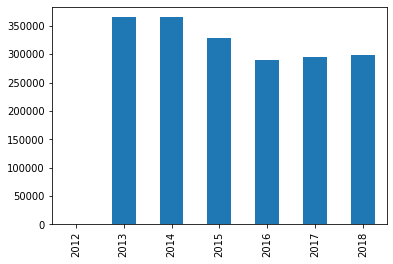

In [155]:
#Bar plot of the number of articles in DNA per year
#Trying to answer the question: does it meet our expecation?: We realllly expect to see 2013-2018 though
#count each occurence of year value in df and plot
valid_date_all_df['Date'].value_counts().sort_index().plot(kind = 'bar')



In [156]:
df['Year'] = valid_date_all_df['Date']

In [157]:
df.head(10)

copyright  \
0  (c) Copyright 2014 Obesity, Fitness & Wellness...   
1  © 2014 The Advisory Board Company. All rights ...   
2  © Copyright 2014 Clinical Trials Week via News...   
3  © Copyright 2018 Journal of Engineering via Ve...   
4  © Copyright 2017 Pharma Business Week via News...   
5  © Copyright iCrowdNewswire LLC 2018. All right...   
6  Copyright 2018 Thomson Reuters. All Rights Res...   
7                     Copyright © 2016. Contify.com    
8  © 2018, The NASDAQ OMX Group, Inc. All Rights ...   
9     (c) 2018  Business Wire. All Rights Reserved.    

                                       subject_codes art  \
0  ,grdly,gscho,nnam,ccat,gcat,gedu,ghea,gtrea,nc...       
1   ,nabst,cempbn,c42,ccat,cwrkpa,ncat,nfact,nfcpin,       
2  ,c23,ctrial,gcancr,gcrese,gsci,c22,ccat,gcat,g...       
3                  ,c151,c15,ccat,ncat,nfact,nfcpin,       
4                        ,ctmark,cgymtr,ccat,cinprp,       
5                       ,gnutr,gcat,gfod,ghea,glife,       
6                                             ,ccat,       
7                                   ,gmed,gcat,ghea,       
8  ,cacqu,npress,c133,c181,c18,cactio,ccat,cgymtr...       
9     ,gdepr,gment,gtrea,npress,gcat,ghea,gmed,ncat,       

   modification_datetime                                               body  \
0          1391132355000  "When we decided to purchase new ultrasound eq...   
1          1390496727000  A similar ban already applies to self-insured ...   
2          1390525806000  Dr. Curiel is the leader for TumAdoR Project 6...   
3          1523916466000  Cost of manufactured product increased $4.7 mi...   
4          1499725044000  The international trademark goods and services...   
5          1523890880000  If you are involved in the Diethylzinc industr...   
6          1522662219000  * UPON APPROVAL, PRODUCT WILL BE COMMERCIALISE...   
7          1482227123000                     Source: XTL Biopharmaceuticals   
8          1522731675000  Fagron strengthens strategic position in USA t...   
9          1524481242000  Sage Therapeutics (NASDAQ: SAGE), a clinical-s...   

     company_codes_occur company_codes_about company_codes_lineage  \
0  ,tshba,tosmsc,toamsi,             ,tshba,                         
1                ,irevs,             ,irevs,                         
2                                                                    
3          ,retrac,nyse,            ,retrac,                         
4               ,brstmy,            ,brstmy,                         
5            ,crak,aknv,                                             
6         ,hhpciz,drred,             ,drred,                         
7               ,xtlbio,            ,xtlbio,                         
8               ,arseus,            ,arseus,                         
9         ,usfda,sgthrp,      ,usfda,sgthrp,                         

                                             snippet  publication_date  ...  \
0  2014 FEB 8 (NewsRx) -- By a News Reporter-Staf...     1391817600000  ...   
1  The Internal Revenue Service last week signale...     1390262400000  ...   
2  2014 JAN 27 (NewsRx) -- By a News Reporter-Sta...     1390780800000  ...   
3  2018 APR 16 (VerticalNews) -- By a News Report...     1523836800000  ...   
4  2017 JUL 10 (NewsRx) -- By a News Reporter-Sta...     1499644800000  ...   
5  A new research study from HTF MI with title Gl...     1523836800000  ...   
6  April 2 (Reuters) - Dr.Reddy's Laboratories Lt...     1522662203000  ...   
7  Dec. 19 -- XTL Biopharmaceuticals Ltd. (NASDAQ...     1482105600000  ...   
8  Nazareth (Belgium)/Rotterdam (The Netherlands)...     1522735233000  ...   
9  Brexanolone IV submission is the Company's fir...     1524481200297  ...   

                                       company_codes  \
0    ,toamsi,toamsi,tosmsc,tosmsc,tshba,tshba,tshba,   
1                                ,irevs,irevs,irevs,   
2                                           ,euruno,   
3             ,retrac,nyse,nys

In [162]:
#csv subsets for 2013-2018 year
#df2013 = df[df['Year'] == '2013']

for i in range(2013, 2019):
    df_year = df[df['Year'] == str(i)]
    df_year.to_csv("../data/working/DNA_" + str(i) + ".csv")
    
